In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.layers import BatchNormalization


In [2]:
image_directory = 'Multi_Label_dataset/Images/'

df = pd.read_csv('Multi_Label_dataset/train.csv')
df = df.iloc[:500]
X_dataset = []
SIZE = 200

In [3]:
for i in tqdm(range(df.shape[0])):
    img = image.load_img(image_directory + df['Id'][i] + '.jpg',target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255
    X_dataset.append(img)

100%|██████████| 500/500 [00:12<00:00, 41.27it/s]


In [4]:
X = np.array(X_dataset)

In [5]:
y = np.array(df.drop(['Id','Genre'], axis = 1))

In [6]:
X_Train, X_Test, y_train, y_test = train_test_split(X,y,random_state=20, test_size=0.3)

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu', input_shape = (SIZE,SIZE,3)))

In [9]:
model.add(BatchNormalization())

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Dropout(0.2))

In [12]:
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [13]:
model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [14]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

In [15]:
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

In [16]:
model.add(Dense(25, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 196, 196, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 32)        12832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(X_Train,y_train,epochs=10,validation_data=(X_Test,y_test),batch_size=64)

Epoch 1/10
6/6 [==============================] - 33s 5s/step - loss: 1.7804 - accuracy: 0.0400 - val_loss: 0.5950 - val_accuracy: 0.0800
Epoch 2/10
6/6 [==============================] - 27s 4s/step - loss: 0.8075 - accuracy: 0.0600 - val_loss: 0.6708 - val_accuracy: 0.0733
Epoch 3/10
6/6 [==============================] - 28s 5s/step - loss: 0.7000 - accuracy: 0.1114 - val_loss: 0.6757 - val_accuracy: 0.3133
Epoch 4/10
6/6 [==============================] - 27s 5s/step - loss: 0.6802 - accuracy: 0.1600 - val_loss: 0.6744 - val_accuracy: 0.2333
Epoch 5/10
6/6 [==============================] - 27s 5s/step - loss: 0.6539 - accuracy: 0.1171 - val_loss: 0.6433 - val_accuracy: 0.1067
Epoch 6/10
6/6 [==============================] - 27s 5s/step - loss: 0.6377 - accuracy: 0.1429 - val_loss: 0.7004 - val_accuracy: 0.0533
Epoch 7/10
6/6 [==============================] - 27s 4s/step - loss: 0.6254 - accuracy: 0.2029 - val_loss: 0.8282 - val_accuracy: 0.0667
Epoch 8/10
6/6 [==================

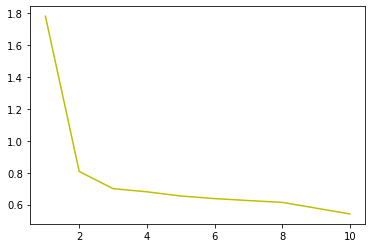

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='training loss')

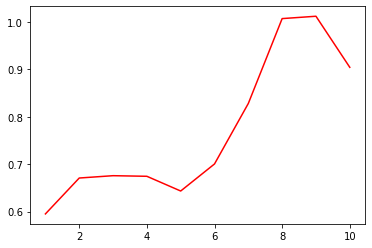

In [21]:
plt.plot(epochs,val_loss,'r',label='Validation loss')

No handles with labels found to put in legend.


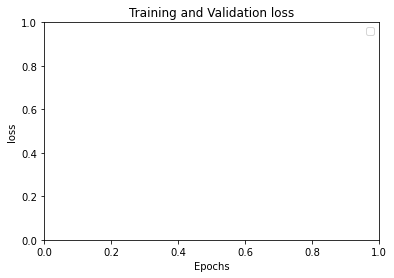

In [22]:
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

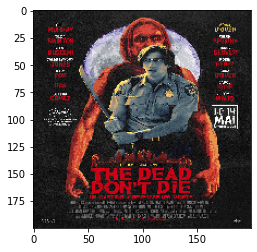

In [28]:
img = image.load_img('Multi_Label_dataset/deaddontdie.jpg', target_size=(SIZE,SIZE,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)

In [29]:
img = np.expand_dims(img,axis=0)
classes = np.array(df.columns[2:])
proba = model.predict(img)
sorted_categories = np.argsort(proba[0])[:-11:-1]

In [25]:
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+ "({:.3})".format(proba[0][sorted_categories[i]]))

Animation(0.973)
Comedy(0.897)
Horror(0.822)
Adventure(0.787)
Drama(0.529)
Romance(0.476)
Reality-TV(0.291)
Family(0.255)
N/A(0.134)
History(0.131)


In [30]:
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+ "({:.3})".format(proba[0][sorted_categories[i]]))

Comedy(0.879)
Animation(0.711)
Reality-TV(0.64)
Adventure(0.583)
Horror(0.583)
Drama(0.574)
Romance(0.366)
Sport(0.356)
Fantasy(0.272)
Western(0.211)


In [31]:
_,acc = model.evaluate(X_Test,y_test)
print("Accuracy = ",(acc*100.0),"%")

5/5 [==============================] - 3s 472ms/step - loss: 0.9044 - accuracy: 0.0667
Accuracy =  6.666667014360428 %
